In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Outputs of the growth perturbation

In [453]:
ode_df_landscape = pd.read_csv('eem_growth_exp_landscape.csv').drop(['Unnamed: 0'], axis=1)
ode_df_timeseries = pd.read_csv('eem_growth_exp_timeseries.csv').drop(['Unnamed: 0'], axis=1)

In [454]:
# adjust df for graphing
melted_df = ode_df_timeseries.melt(id_vars=['time', 'magnitude', 'repro_changes'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [455]:
melted_df = melted_df.rename(columns={'magnitude': 'Duration (years)', 'repro_changes': 'Change in veg reproduction'})


In [446]:
# look only at the perturbation section
df = melted_df.loc[melted_df["time"] >= 515]

In [456]:
df = df.loc[df["time"] <= 750]

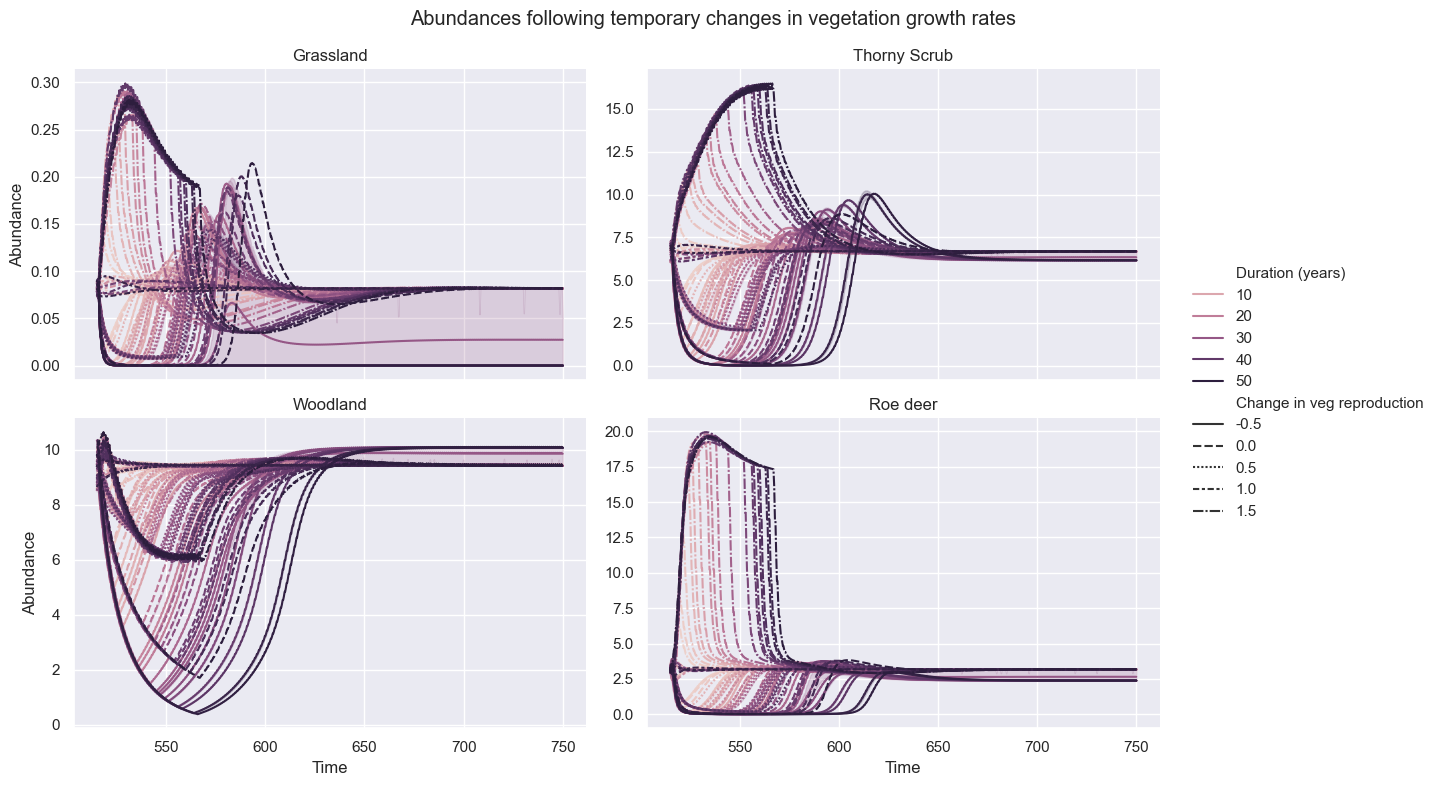

In [457]:

# Create a FacetGrid with subplots
g = sns.FacetGrid(df, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', hue='Duration (years)', style='Change in veg reproduction')

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary changes in vegetation growth rates')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

In [ ]:
# adjust df for graphing
melted_df_stochastic = ode_stochastic_timeseries.melt(id_vars=['time', 'Noise', 'Optimised'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

# Now look at perturbation 2

In [399]:
df1 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_one_0025.csv').drop(['Unnamed: 0'], axis=1) 
df2 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_one_005.csv').drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_one_0025_no_opt.csv').drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_one_001_no_opt.csv').drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_one_005_no_opt.csv').drop(['Unnamed: 0'], axis=1)

ode_stochastic_timeseries = pd.concat([df1, df2, df3, df4, df5])

In [398]:
ode_stochastic_timeseries

,exmoorPony,fallowDeer,grasslandParkland,longhornCattle,redDeer,roeDeer,tamworthPig,thornyScrub,woodland,time,Noise,Optimised
0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0025,yes
1,0.000000,0.000000,0.971721,0.000000,0.000000,1.326964,0.000000,1.112299,1.034174,0.340909,0.0025,yes
2,0.000000,0.000000,0.949198,0.000000,0.000000,1.586309,0.000000,1.235925,1.069427,0.681818,0.0025,yes
3,0.000000,0.000000,0.930618,0.000000,0.000000,1.774479,0.000000,1.371863,1.105919,1.022727,0.0025,yes
4,0.000000,0.000000,0.914342,0.000000,0.000000,1.916241,0.000000,1.521078,1.143860,1.363636,0.0025,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
454795,0.836980,28.565583,0.000000,2.576868,6.686487,2.237484,1.179506,20.444065,0.000000,1515.375000,0.0050,no
454796,0.455517,14.081886,0.000000,1.297694,3.287154,1.290346,0.724578,10.609523,0.000000,1515.750000,0.0050,no
454797,0.650000,5.900000,0.000000,1.500000,2.700000,1.290346,0.550000,10.609523,0.000000,1516.000000,0.0050,no
454798,0.405656,5.438291,0.000000,0.967487,1.945440,0.962556,0.462390,21.203512,0.000000,1516.375000,0.0050,no


In [403]:
# adjust df for graphing
melted_df_stochastic_ga = ode_stochastic_timeseries.melt(id_vars=['time', 'Noise', 'Optimised'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [407]:
# look only at the perturbation section
df = melted_df_stochastic_ga.loc[melted_df_stochastic_ga["time"] >= 499]

In [417]:
# calculate median
grouped_df = df.groupby(['time', 'Variable', 'Noise', 'Optimised'])['Value'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()
grouped_df

,time,Variable,Noise,Optimised,median,percentile_95th,percentile_5th
0,499.00,grasslandParkland,0.0010,no,0.081598,0.081598,0.081598
1,499.00,grasslandParkland,0.0025,no,0.081598,0.081598,0.081598
2,499.00,grasslandParkland,0.0025,yes,0.081598,0.081598,0.081598
3,499.00,grasslandParkland,0.0050,no,0.081598,0.081598,0.081598
4,499.00,grasslandParkland,0.0050,yes,0.081598,0.081598,0.081598
...,...,...,...,...,...,...,...
61075,1516.75,woodland,0.0010,no,8.135600,9.923949,6.229027
61076,1516.75,woodland,0.0025,no,0.022613,4.821386,0.000000
61077,1516.75,woodland,0.0025,yes,0.401421,8.326067,0.000000
61078,1516.75,woodland,0.0050,no,0.000000,0.000000,0.000000


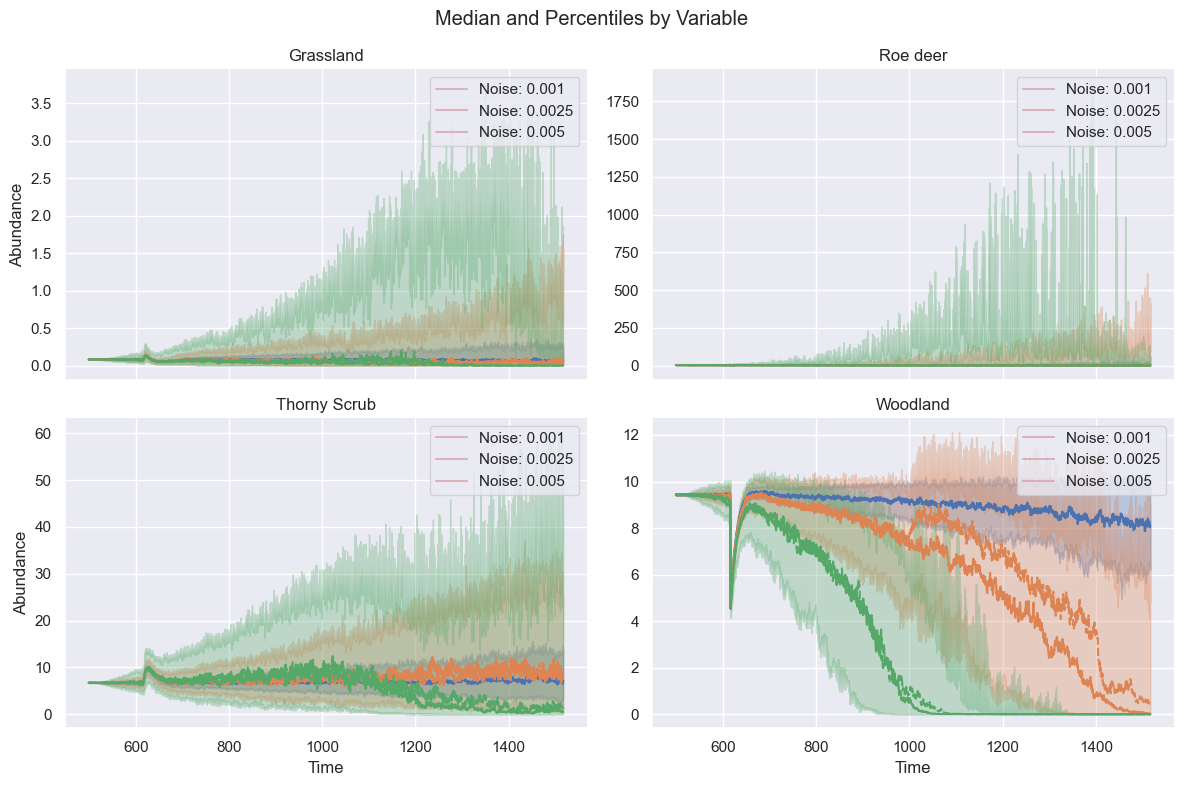

In [418]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(grouped_df, col='Variable', col_wrap=2, height=4, aspect=1.5, hue="Noise", sharey=False)


# Iterate over each variable and plot the lines with fill_between
for variable, ax in zip(grouped_df['Variable'].unique(), g.axes):
    # Filter the data for the specific variable
    data = grouped_df[grouped_df['Variable'] == variable]
    
    # Get the unique noise levels for the variable
    noise_levels = data['Noise'].unique()
    
    # Initialize a list to store the lines and labels for the legend
    lines = []
    labels = []
    
    # Iterate over each noise level and plot the fill between the percentiles
    for i, noise in enumerate(noise_levels):
        # Filter the data for the specific noise level
        noise_data = data[data['Noise'] == noise]
        
        # Get the values for the percentiles
        lower = noise_data[noise_data.columns[-2]].values
        upper = noise_data[noise_data.columns[-1]].values
        
        # Get the color for the line and fill_between
        line_color = sns.color_palette()[i]
        fill_color = line_color
        
        # Plot the line
        sns.lineplot(data=noise_data, x='time', y='median', style = "Optimised", color=line_color, ax=ax)
        
        # Plot the fill_between
        ax.fill_between(noise_data['time'], lower, upper, alpha=0.3, color=fill_color)
    
        # Append the line and label to the legend lists
        lines.append(line)
        labels.append(f"Noise: {noise}")
    
    # Add the legend for the variable
    ax.legend(lines, labels)

    # Set the title for each subplot
    ax.set_title(variable)

# Set the overall title for the facetgrid
g.fig.suptitle("Median and Percentiles by Variable")

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Roe deer','Thorny Scrub', 'Woodland']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the spacing between subplots
g.fig.tight_layout()

# Show the plot
plt.show()

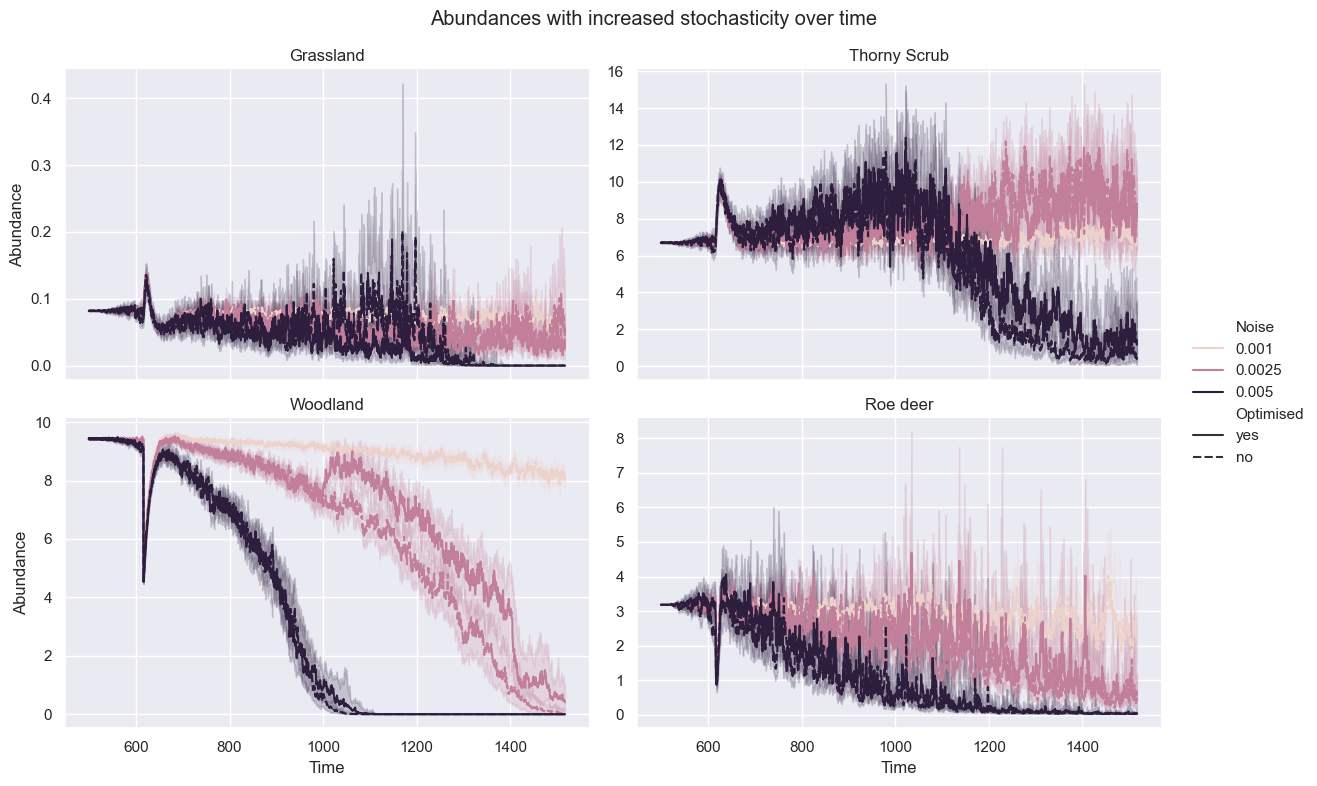

In [416]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(df, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', hue="Noise", style="Optimised", ci= 95)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances with increased stochasticity over time')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# Look at GA outputs

In [124]:
ga_ode_stochastic_timeseries = pd.read_csv('eem_ga_timeseries.csv').drop(['Unnamed: 0'], axis=1)

In [125]:
# adjust df for graphing
melted_df_stochastic_ga = ga_ode_stochastic_timeseries.melt(id_vars=['time'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [126]:
# look only at the perturbation section
df_ga = melted_df_stochastic_ga.loc[melted_df_stochastic_ga["time"] >= 499]

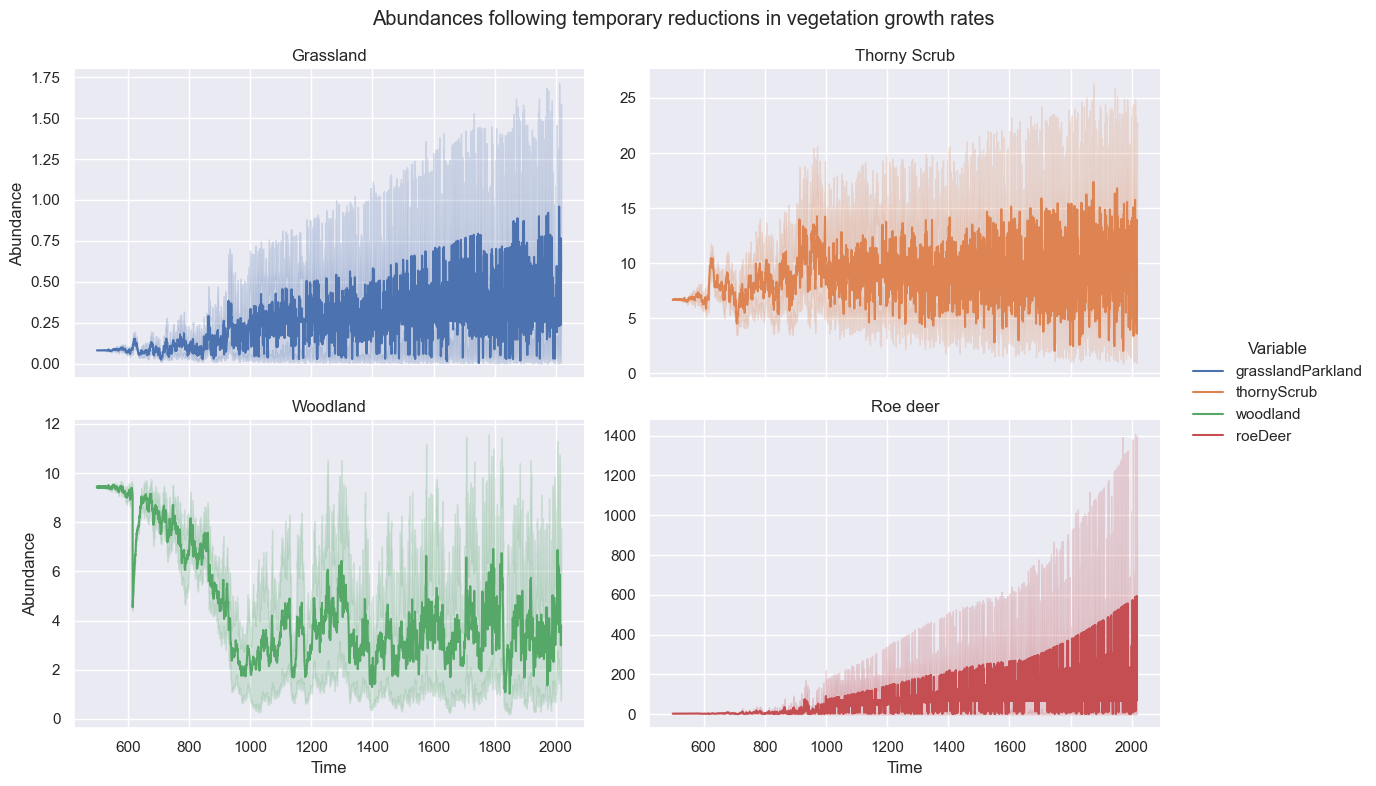

In [127]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(df_ga, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False, hue="Variable")

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', ci=95)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary reductions in vegetation growth rates')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# And the uncertainty with the ODE

In [266]:
df1 = pd.read_csv('eem_ga_timeseries_uncertainty.csv').drop(['Unnamed: 0'], axis=1)
df2 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_0025.csv').drop(['Unnamed: 0'], axis=1)
# df3 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_005.csv').drop(['Unnamed: 0'], axis=1)
# df4 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_0075.csv').drop(['Unnamed: 0'], axis=1)
df_combined = pd.concat([df1, df2])

In [267]:
# adjust df for graphing
melted_df_stochastic_ga = df_combined.melt(id_vars=['time', 'Noise', 'Optimised'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [268]:
# look only at the perturbation section
df_ga = melted_df_stochastic_ga.loc[melted_df_stochastic_ga["time"] >= 499]

In [274]:
df_ga

,time,Noise,Optimised,Variable,Value
1494,499.000,0.0010,no,grasslandParkland,0.243773
1495,499.375,0.0010,no,grasslandParkland,0.244522
1496,499.750,0.0010,no,grasslandParkland,0.243773
1497,500.000,0.0010,no,grasslandParkland,0.243773
1498,500.375,0.0010,no,grasslandParkland,0.244522
...,...,...,...,...,...
18191995,1515.375,0.0025,yes,roeDeer,0.184529
18191996,1515.750,0.0025,yes,roeDeer,0.147354
18191997,1516.000,0.0025,yes,roeDeer,0.147354
18191998,1516.375,0.0025,yes,roeDeer,0.144259


In [293]:
# calculate median
grouped_df = df_ga.groupby(['time', 'Variable', 'Noise', 'Optimised'])['Value'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()
grouped_df

,time,Variable,Noise,Optimised,median,percentile_95th,percentile_5th
0,499.00,grasslandParkland,0.0010,no,0.123941,0.236075,0.000157
1,499.00,grasslandParkland,0.0025,no,0.123941,0.236075,0.000157
2,499.00,grasslandParkland,0.0025,yes,0.123941,0.236075,0.000157
3,499.00,grasslandParkland,0.0050,no,0.123941,0.236075,0.000157
4,499.00,grasslandParkland,0.0075,no,0.123941,0.236075,0.000157
...,...,...,...,...,...,...,...
61075,1516.75,woodland,0.0010,no,8.529600,10.775799,6.192262
61076,1516.75,woodland,0.0025,no,0.918417,8.058692,0.000000
61077,1516.75,woodland,0.0025,yes,2.866398,10.964015,0.000000
61078,1516.75,woodland,0.0050,no,0.000000,0.000111,0.000000


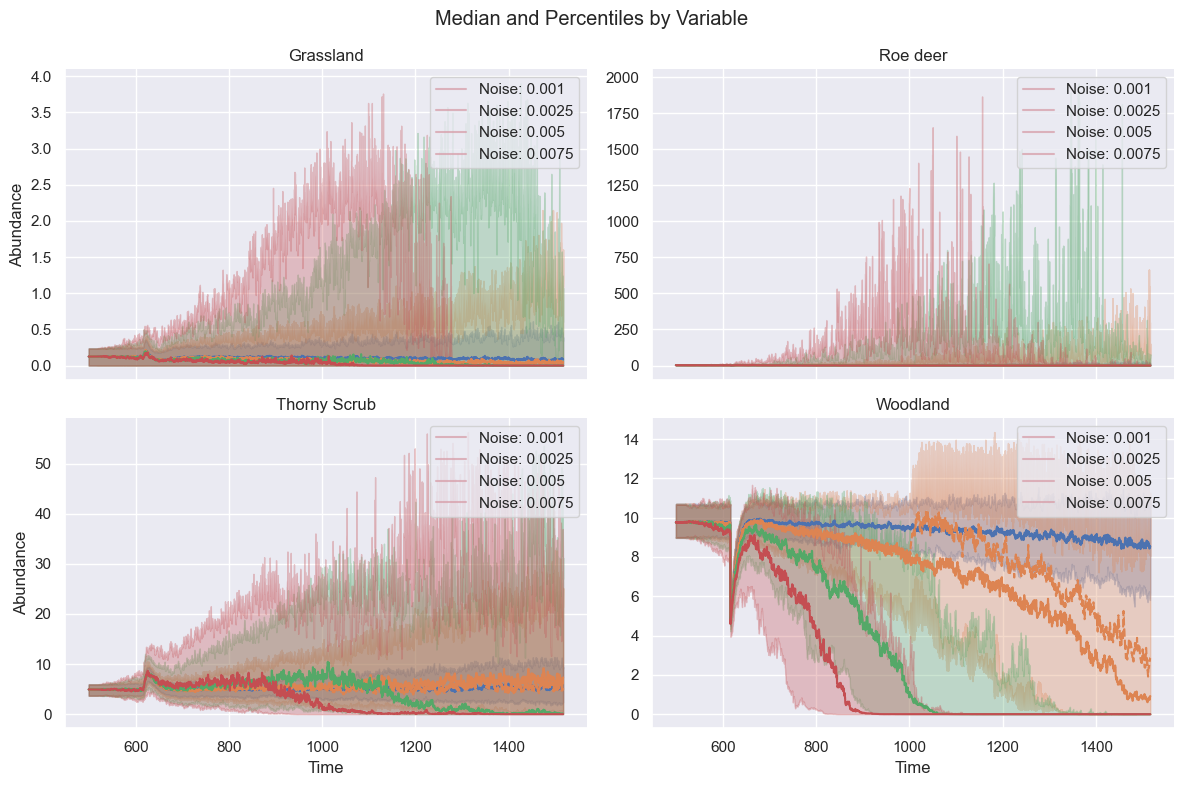

In [331]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(grouped_df, col='Variable', col_wrap=2, height=4, aspect=1.5, hue="Noise", sharey=False)


# Iterate over each variable and plot the lines with fill_between
for variable, ax in zip(grouped_df['Variable'].unique(), g.axes):
    # Filter the data for the specific variable
    data = grouped_df[grouped_df['Variable'] == variable]
    
    # Get the unique noise levels for the variable
    noise_levels = data['Noise'].unique()
    
    # Initialize a list to store the lines and labels for the legend
    lines = []
    labels = []
    
    # Iterate over each noise level and plot the fill between the percentiles
    for i, noise in enumerate(noise_levels):
        # Filter the data for the specific noise level
        noise_data = data[data['Noise'] == noise]
        
        # Get the values for the percentiles
        lower = noise_data[noise_data.columns[-2]].values
        upper = noise_data[noise_data.columns[-1]].values
        
        # Get the color for the line and fill_between
        line_color = sns.color_palette()[i]
        fill_color = line_color
        
        # Plot the line
        sns.lineplot(data=noise_data, x='time', y='median', style = "Optimised", color=line_color, ax=ax)
        
        # Plot the fill_between
        ax.fill_between(noise_data['time'], lower, upper, alpha=0.3, color=fill_color)
    
        # Append the line and label to the legend lists
        lines.append(line)
        labels.append(f"Noise: {noise}")
    
    # Add the legend for the variable
    ax.legend(lines, labels)

    # Set the title for each subplot
    ax.set_title(variable)

# Set the overall title for the facetgrid
g.fig.suptitle("Median and Percentiles by Variable")

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Roe deer','Thorny Scrub', 'Woodland']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the spacing between subplots
g.fig.tight_layout()

# Show the plot
plt.show()

In [361]:
# it can be optimised to come back to original equilibrium, however x% still have declining woodland
optim = df_ga.loc[df_ga["Optimised"] == "yes"]
# last time step
last = optim.loc[optim["time"] == 1516.750]
wood = last.loc[last["Variable"] == "woodland"]
# value 
above = wood.loc[wood["Value"] >= 8.5] 
final = above.loc[above["Value"] <= 10.4] 
len(final)/200

0.1

In [362]:
# what is the risk of having even more woodland?
len(wood.loc[wood["Value"] > 10.4])/200

0.06

In [363]:
# what is the risk of it declining further? 
len(wood.loc[wood["Value"] < 8.5])/200

0.84